In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset= pd.read_csv("sonar.csv")

In [3]:
# Dimension du jeu de données
print(f"Dimension du jeu de données: {dataset.shape}")

# Types des données
print(f"Types des données: {dataset.dtypes}")

# Aperçu des données
print("Aperçu des données:")

print(dataset.head())

Dimension du jeu de données: (207, 61)
Types des données: 0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object
Aperçu des données:
   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ..

In [4]:
# Résumé statistique
print("\nRésumé statistique:")
print(dataset.describe())


Résumé statistique:
           0.0200      0.0371      0.0428      0.0207      0.0954      0.0986  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.029208    0.038443    0.043837    0.054053    0.075105    0.104599   
std      0.023038    0.033040    0.038521    0.046583    0.055669    0.059247   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013300    0.016400    0.018900    0.024450    0.037700    0.066950   
50%      0.022800    0.030800    0.034200    0.044100    0.062000    0.092100   
75%      0.035800    0.048100    0.058200    0.065700    0.101050    0.134150   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

           0.1539      0.1601      0.3109      0.2111  ...      0.0232  \
count  207.000000  207.000000  207.000000  207.000000  ...  207.000000   
mean     0.121591    0.134677    0.177361    0.208245  ...    0.016034   
std      0.061897    0.0853

In [5]:
# Répartition des classes de données
print("\nRépartition des classes de données:")
print(dataset.value_counts())


Répartition des classes de données:
0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  0.1609  0.1582  0.2238  0.0645  0.0660  0.2273  0.3100  0.2999  0.5078  0.4797  0.5783  0.5071  0.4328  0.5550  0.6711  0.6415  0.7104  0.8080  0.6791  0.3857  0.1307  0.2604  0.5121  0.7547  0.8537  0.8507  0.6692  0.6097  0.4943  0.2744  0.0510  0.2834  0.2825  0.4256  0.2641  0.1386  0.1051  0.1343  0.0383  0.0324  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  0.0090  0.0032  R
0.1371  0.1226  0.1385  0.1484  0.1776  0.1428  0.1773  0.2161  0.1630  0.2067  0.4257  0.5484  0.7131  0.7003  0.6777  0.7939  0.9382  0.8925  0.9146  0.7832  0.7960  0.7983  0.7716  0.6615  0.4860  0.5572  0.4697  0.5640  0.4517  0.3369  0.2684  0.2339  0.3052  0.3016  0.2753  0.1041  0.1757  0.3156  0.3603  0.2736  0.1301  0.2458  0.3404  0.1753  0.0679  0.1062  0.0643  0.0532  0.0531  0.0272  0.0171  0.0118  0.0129  0.0344  0.0065  0.0067  0.0022  0.0079  0.0146  0.0051  M

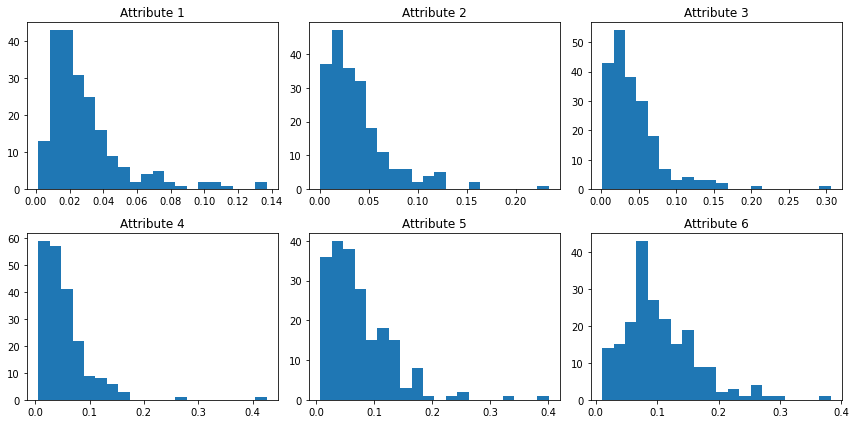

In [6]:
# Histograms
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(dataset.iloc[:, i], bins=20)
    plt.title(f"Attribute {i+1}")
plt.tight_layout()
plt.show()

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(dataset.corr(), annot=True, cmap="YlOrRd")
plt.title("Correlation Matrix")
plt.show()

In [8]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import cross_val_score

def evaluate_model(model):
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    return scores.mean()


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

for model in models:
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {evaluate_model(model):.2f}")


Model: LogisticRegression
Accuracy: 0.65
Model: KNeighborsClassifier
Accuracy: 0.59
Model: DecisionTreeClassifier
Accuracy: 0.59
Model: SVC
Accuracy: 0.64


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.pipeline import Pipeline

def evaluate_model_with_scaling(model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
    return scores.mean()


In [13]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

for model in models:
    print(f"Model: {type(model).__name__}")
    print(f"Précision: {evaluate_model_with_scaling(model):.2f}")


Model: LogisticRegression
Précision: 0.66
Model: KNeighborsClassifier
Précision: 0.61
Model: DecisionTreeClassifier
Précision: 0.65
Model: SVC
Précision: 0.68


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.1, 1, 10]}
logistic_reg = LogisticRegression()
grid_search = GridSearchCV(logistic_reg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

print(f"Meilleure précision: {grid_search.best_score_:.2f}")
print(f"Meilleur paramètre C: {grid_search.best_params_['C']}")


Meilleure précision: 0.65
Meilleur paramètre C: 1


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)

print(f"Meilleure précision: {grid_search.best_score_:.2f}")
print(f"Meilleurs paramètres: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")


Meilleure précision: 0.65
Meilleurs paramètres: C=10, gamma=0.1


In [16]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

# AdaBoost
ada_boost = AdaBoostClassifier()
ada_boost_score = cross_val_score(ada_boost, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision AdaBoost: {ada_boost_score:.2f}")

# Gradient Boosting
grad_boost = GradientBoostingClassifier()
grad_boost_score = cross_val_score(grad_boost, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision Gradient Boosting: {grad_boost_score:.2f}")

# Random Forest
random_forest = RandomForestClassifier()
random_forest_score = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision Random Forest: {random_forest_score:.2f}")


Précision AdaBoost: 0.67
Précision Gradient Boosting: 0.70
Précision Random Forest: 0.74


In [17]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle SVM sur l'ensemble des données d'entraînement
from sklearn.svm import SVC

svm_clf = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svm_clf.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = svm_clf.predict(X_test_scaled)

# Évaluation des performances sur le jeu de test
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur le jeu de test: {accuracy:.2f}")


Précision sur le jeu de test: 0.79
